In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# выгрузка пожертований в пользу благотворительной организации за год
# типы: оплата (разовое пожертвование), оплата с созданием подписки, регулярное пожертвование (происходит автоматически)
data = pd.read_excel('test.xlsx')

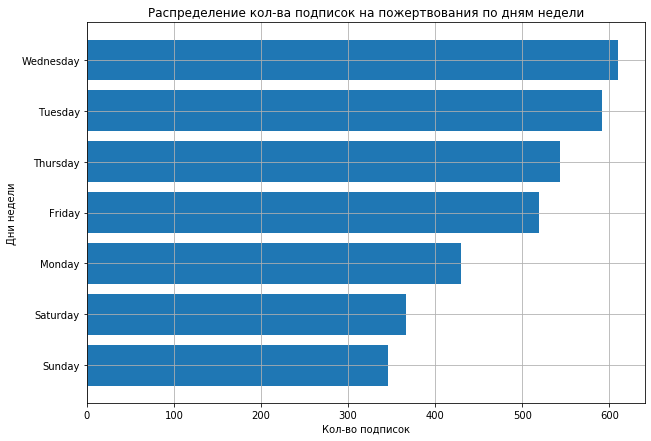

In [4]:
# получим зависимость кол-ва подписок на регулярное пожертвование от дня недели
# для этого строим столбчатую диаграмму
# основной вывод: в выходные дни оформляется примерно в два раза меньше пожертвований, чем в пиковую среду

data['date'] =  pd.to_datetime(data['date'], format='%d%b%Y:%H:%M:%S.%f')
data['weekday'] = data['date'].dt.day_name()

grouped = data[data['type'] == 'Оплата с созданием подписки'].groupby('weekday').agg({
    'sum':['mean','count','sum','median']
}).reset_index()
grouped['percent'] = round(grouped['sum']['count']/sum(grouped['sum']['count'])*100)
grouped = grouped.sort_values(("sum",'count'), ascending=True)

plt.barh(grouped['weekday'], grouped['sum']['count'])
plt.xlabel('Кол-во подписок')
plt.ylabel('Дни недели')
plt.title('Распределение кол-ва подписок на пожертвования по дням недели')
plt.grid()

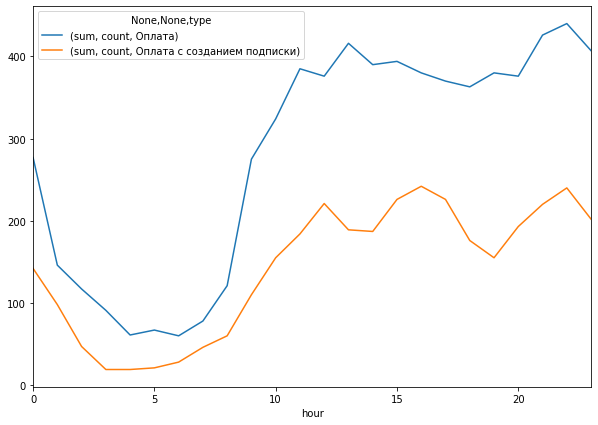

In [35]:
# проследим зависимость количества оформляемых пожертвований от времени суток
# при этом сравним значения для регулярных и разовых пожертвований
# выводы: большая часть пожертвований приходит из Москвы и Петербурга, поэтому очевиден спад с 00:00 до 9:00, зависимость от 
# времени суток одинакова как для разовых, так и для регулряных пожертвований, в обоих случаях пик наблюдается около 23:00

data['hour'] = data['date'].dt.hour
grouped_by_hour = data[(data['type'] != 'Регулярная оплата')].groupby(['hour', 'type']).agg({
    'sum':['count']
})

grouped_by_hour.unstack('type').plot()

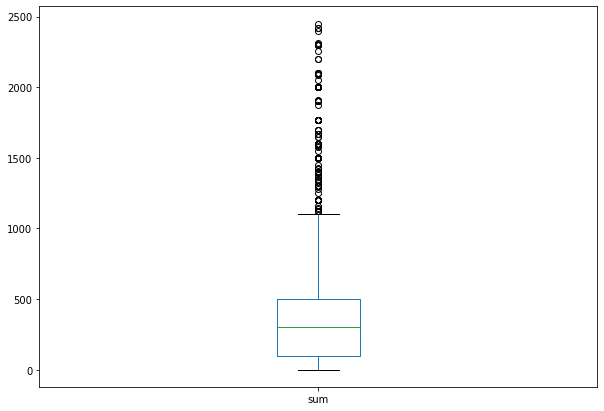

In [5]:
# благодаря боксплоту можно увидить распределения количества пожертвований с определенной суммой
# пришлось ограничить данные 2500 руб, так как иначе самый большой выброс (200 000) не позволял даже увидеть боксплот
# можно заметить, что медианой является значение в 300 рублей, пожертвования лежат в пределах 1-1100 руб, 25% процентиль - 100 руб,
# 75% - 500 руб

data_for_boxplot = data[data['sum'] < 2500]
data_for_boxplot['sum'].plot(kind='box')

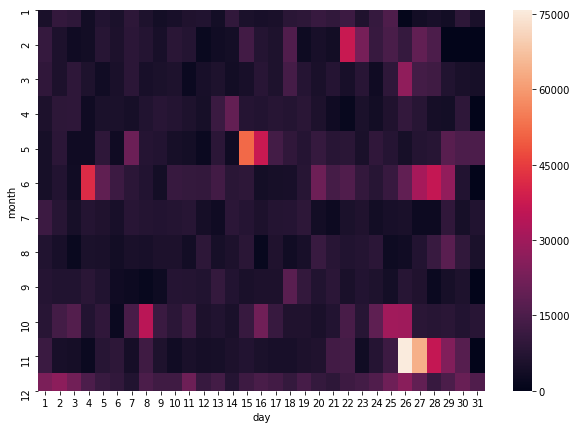

In [23]:
# построена тепловая карта дневной суммы пожертвований в течение года, сумма ограничена максимальным значением из боксплота
# выводы: в среднем больше всего жертвовали в декабре, так как именно декабрьская полоска выглядит светлее всего
# видны всплески в середине мая и конце ноября, плюс, кажется, что конец месяцев приносит в среднем больше пожертвований, чем начало

data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

pivot_table = data[(data['sum'] < 1100) & (data['type'] != 'Регулярная оплата')].pivot_table(
    index='month', 
    columns='day', 
    values='sum',aggfunc=sum).fillna(0).applymap(float)

ax = sns.heatmap(pivot_table)

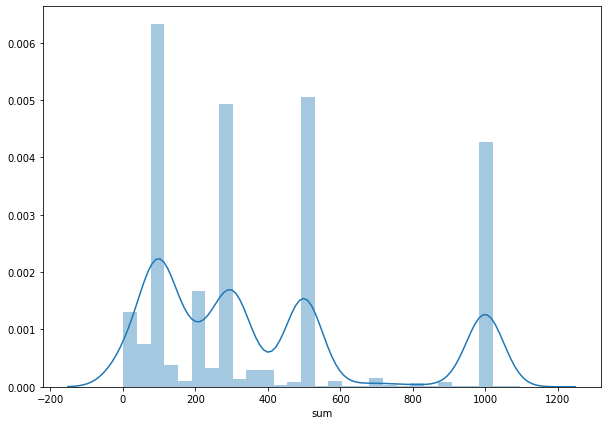

In [40]:
# график распределения сумм показывает, что судя по всему людям удобнее оставлять пожертвования кратные 100 руб,
# причем интересно, что участок от 500 до 1000 рублей почти пустой, а последнее пиковое значение в 1000 рублей меньше чем
# в два раза отличается от первого пикового в 100 рублей
# при этом нет ничего даже близкого к нормальному распределению

data_= data[(data['sum'] < 1100) & (data['type'] != 'Регулярная оплата')]
sns.distplot(data_['sum'])